In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns =inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])
columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [12]:
columns =inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])
columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Climate Analysis

In [13]:
session.query(func.count(Measurement.prcp)).all()



[(18103)]

In [14]:
#session.query(func.count(Measurement.date)).all()
qry = session.query(Station.station, Station.name).all()
dict = {}
for stat in qry:
    dict [stat.station] = stat.name
    
dict    


{'USC00519397': 'WAIKIKI 717.2, HI US',
 'USC00513117': 'KANEOHE 838.1, HI US',
 'USC00514830': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'USC00517948': 'PEARL CITY, HI US',
 'USC00518838': 'UPPER WAHIAWA 874.3, HI US',
 'USC00519523': 'WAIMANALO EXPERIMENTAL FARM, HI US',
 'USC00519281': 'WAIHEE 837.5, HI US',
 'USC00511918': 'HONOLULU OBSERVATORY 702.2, HI US',
 'USC00516128': 'MANOA LYON ARBO 785.2, HI US'}

In [15]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [16]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
last_date

'2017-08-23'

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

qry = session.query(Measurement).filter(Measurement.date <= '2017-08-23').\
        filter(Measurement.date >= '2016-08-23').all()
x = []
y = []
for m in qry:
    x.append(m.date)
    y.append(m.prcp)
    #print(m.prcp, m.date)
print(x)
print(y)

['2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-10', '2016-09-11', '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-17', '2016-09-18', '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24', '2016-09-25', '2016-09-26', '2016-09-27', '2016-09-28', '2016-09-29', '2016-09-30', '2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08', '2016-10-09', '2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30', '2016-10-31', '2016-11-01', '2016

In [18]:
dict = {}
for dt, prcp in zip(x, y):
    dict[dt] = prcp

dict

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

In [19]:
# Calculate the date 1 year ago from the last data point in the database
latest_date = datetime.datetime.strptime(last_date,'%Y-%m-%d')
one_yr_back = datetime.datetime(latest_date.year-1, latest_date.month, latest_date.day, 0, 0)

print(f"Latest date is {latest_date}")
print(f"one_yr_back is {one_yr_back}")

Latest date is 2017-08-23 00:00:00
one_yr_back is 2016-08-23 00:00:00


In [20]:
# Perform a query to retrieve the data and precipitation scores
one_yr_data = session.query(Measurement).filter(Measurement.date <= latest_date).filter(Measurement.date > one_yr_back)
one_yr_data

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column

dt_list = []
prcp_list = []

for row in one_yr_data:
    dt_list.append(row.date)
    prcp_list.append(row.prcp)

df = pd.DataFrame({
            "Date": dt_list,
            "Precipitation": prcp_list
        })

df = df.set_index('Date')

df['Precipitation'] = df['Precipitation'].fillna(0)
# df

In [22]:
# Sort the dataframe by date
sorted_df = df.sort_values(by='Date')
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


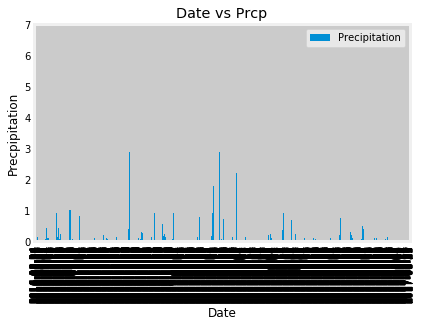

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
# X_axis=m.date
# Y_axis=m.prcp

sorted_df.plot(kind='bar')
plt.minorticks_off()
plt.xlabel('Date')
plt.ylabel('Precpipitation')
# plt.tight_layout()
plt.title('Date vs Prcp')
plt.savefig('precipitation.png')
plt.show()

In [24]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?

Active_Stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
                  order_by(func.count(Measurement.station).desc())

for row in Active_Stations:
    print(row)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [26]:
most_active_station = Active_Stations.first().station
print(f"most_active_station = {most_active_station}")

most_active_station = USC00519281


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

active_station_data = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).first()

min_temp = active_station_data[0]
max_temp = active_station_data[1]
avg_temp = active_station_data[2]


In [28]:
# Choose the station with the highest number of temperature observations.
most_active_station = Active_Stations.first().station
print(f"most_active_station = {most_active_station}")



most_active_station = USC00519281


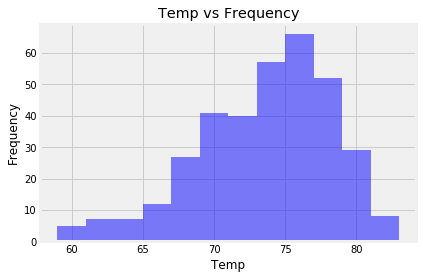

In [29]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_yr_temp_obs = one_yr_data.filter(Measurement.station == most_active_station) 
tobs = []
for row in last_yr_temp_obs:
    tobs.append(row.tobs)

num_bins = 12
n, bins, patches = plt.hist(tobs, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.title('Temp vs Frequency')
plt.savefig('station-histogram.png')
plt.show()


In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_date = "2016-08-01"
end_date = "2016-08-10"

temps = calc_temps('2016-08temps -01', '2017-08-10')
tmin, tavg, tmax = temps[0]
print(tmin, tavg, tmax )


58.0 74.39169419537518 87.0


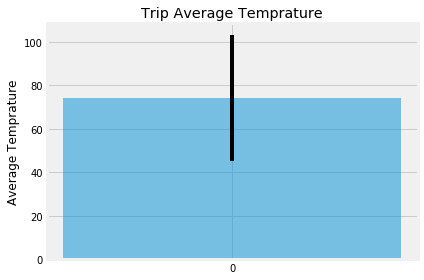

In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
x_pos = [ 0 ]
y_pos = [ tavg ]
error = [ tmax - tmin ]
ax.bar(x_pos, y_pos, yerr=error, align='center', alpha=0.5, ecolor='black')
ax.set_ylabel('Average Temprature')
ax.set_xticks(x_pos)
ax.set_title('Trip Average Temprature')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()


In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
start_date = "2016-08-01"
end_date = "2016-08-10"

session.query(Measurement.station,func.sum(Measurement.prcp)).filter(Measurement.date <= end_date).\
        filter(Measurement.date >= start_date).group_by(Measurement.station).all()


[('USC00513117', 3.92),
 ('USC00514830', 1.04),
 ('USC00516128', 5.229999999999999),
 ('USC00517948', 0.18),
 ('USC00519281', 6.319999999999998),
 ('USC00519397', 0.5900000000000001),
 ('USC00519523', 1.3100000000000003)]

In [34]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

same_station = session.query(Measurement,Station).filter(Measurement.station == Station.station).limit(3).all()

for station in same_station:
    (m,s)=station
    print(m.station,s.station)


USC00519397 USC00519397
USC00519397 USC00519397
USC00519397 USC00519397


In [35]:
sel = [Measurement.prcp, Measurement.station, Station.latitude, Station.longitude, Station.elevation ]
same_station = session.query(*sel).filter(Measurement.station == Station.station).order_by(Measurement.prcp.desc()).limit(5).all()

for station in same_station:
    (prcp, name, latitude, longitude, elevation) = station
    
    print (f"Measurement prcp and name'{prcp},{name}'")
    print (f"Station details'{latitude},{longitude},{elevation}'")
    

Measurement prcp and name'11.53,USC00514830'
Station details'21.5213,-157.8374,7.0'
Measurement prcp and name'9.64,USC00519281'
Station details'21.45167,-157.84888999999998,32.9'
Measurement prcp and name'8.81,USC00519281'
Station details'21.45167,-157.84888999999998,32.9'
Measurement prcp and name'8.06,USC00516128'
Station details'21.3331,-157.8025,152.4'
Measurement prcp and name'7.97,USC00519281'
Station details'21.45167,-157.84888999999998,32.9'
